In [405]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

In [406]:
### Regular Expression
#pattern = re.compile(r'\w*:\d*')
#pattern = re.compile(r'^\w*.\w*.\s\w*.\w*', re.I)
pattern = re.compile(r'[est]*.[^t]*', re.I)
pattern = re.compile('(e|t|s)*', re.I)
pattern = re.compile('[a-z]*.*o+', re.I)
pattern = re.compile('[a-z]*.*o{2,3}', re.I)
m = pattern.match('Test1:fooooood, Test2:123')
print(m)

# letters

# pattern = re.sub(r'\w+')
# m = pattern.match('test123')
# print(m)

<re.Match object; span=(0, 13), match='Test1:foooooo'>


In [413]:
df = pd.read_csv (r'C:\Users\yidan\Desktop\Projects\Kaggle ML Excercise\train.csv')
print (df.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [414]:
y = df.loc[:, ['SalePrice']]
y.head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [415]:
### feature engineering
# reconstruction gap year
df['YearRemodGap'] = df['YearRemodAdd'] - df['YearBuilt']

In [420]:
### data cleaning
# missing values
for col in list(df.columns):
    

nan_row = df [~(df ['Electrical'].isin (['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix']))]
nan_row.replace(float(np.nan), 0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearRemodGap
1379,1380,80,RL,73.0,9735,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,5,2008,WD,Normal,167500,1


In [410]:
# data cleaning
# select numerical columns
for i in df.columns:
        if df[i].dtypes not in ['int64', 'float64'] or i == 'Id' or i == 'SalePrice':
            df = df.drop(columns = [i])

print('Numberic columns left:', len(df.columns))

Numberic columns left: 37


In [364]:
#df['Electrical'].replace (np.nan, 0)
df['Electrical'].replace(float(np.nan), 0)
df['Electrical'].unique()
# for i in arr:
#     if i != np.nan:
#         print('N') 

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [343]:
for v in list(df['Electrical'].unique()):
    if np.isnan(v) == 'True':
        print('Y')
    else:
        print('N')
print(df['Electrical'].unique())


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [423]:
# missing values
col_miss =[]
for col in df.columns:
    # if np.nan is in list(df[i].unique())
    for v in list(df[col].unique()):
        if v == float(np.nan):
            col_miss.append(col)
print(col_miss)

[]


In [432]:
for i in df.columns:
    all_rolls = df[i].unique()
    for each_value in all_rolls:
        if each_value == np.nan:
            print('True')

In [245]:
# 为每列数据绘制直方图 plot data distribution for each column
def data_dist(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtypes in ['int64', 'float64'] and i != 'Id':
            plt.hist(dataframe[i], bins=50, density=False, alpha=0.6, color='b')
            plt.title(i+" Freq")
            plt.show()

In [76]:
# 列名称需添加单引号 enter columnname with single quotation marks
def top_values (dataframe, columnname, n):
    unique, frequency = np.unique(df[columnname], 
                                      return_counts = True)
    
    myDict = {}
    myDict = {k: v for k, v in zip(unique, frequency)}

    rankDict = sorted(myDict.items(), key=lambda x: x[1], reverse=True)
    for i in range(n):
        print('Top',i+1,'value:', rankDict[i][0], ', with count(s) at:', rankDict[i][1])

In [74]:
top_values(df, 'MSSubClass', 3)

Top 1 value: 20 , with count(s) at: 536
Top 2 value: 60 , with count(s) at: 299
Top 3 value: 50 , with count(s) at: 144


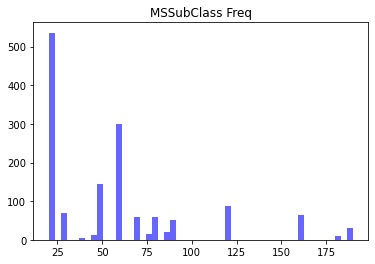

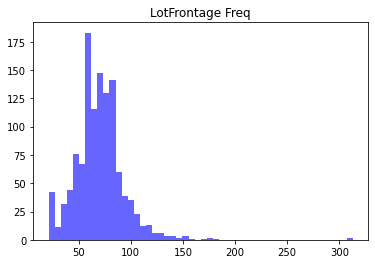

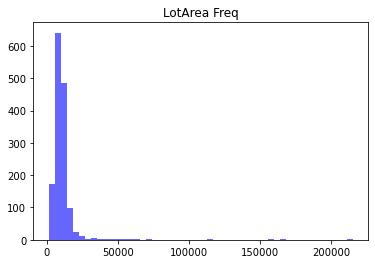

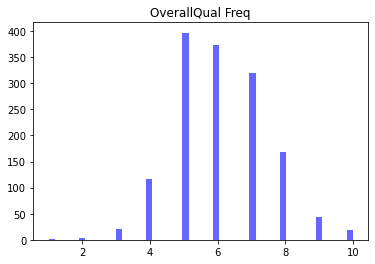

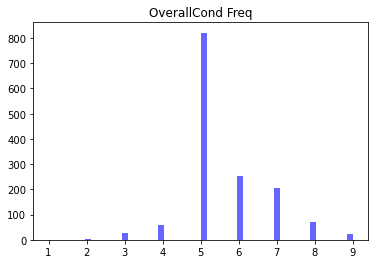

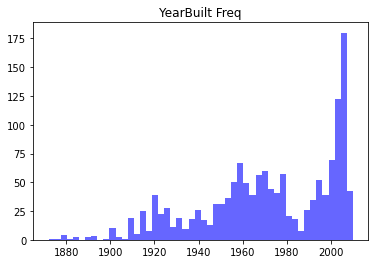

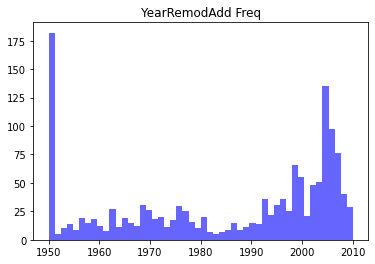

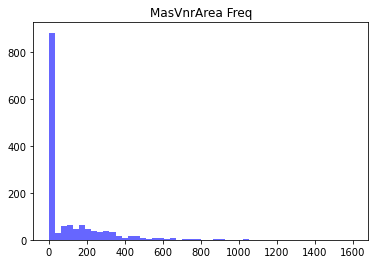

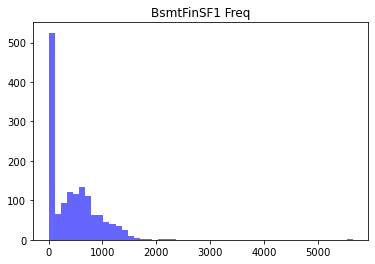

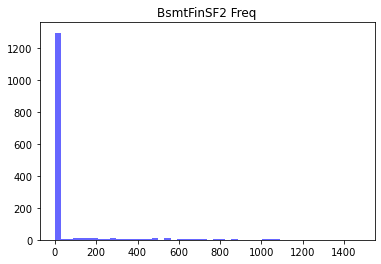

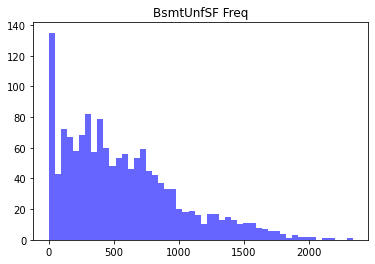

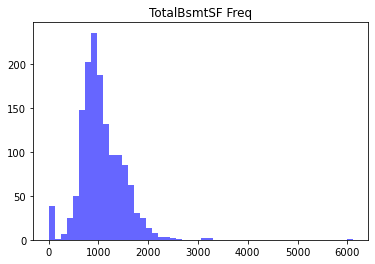

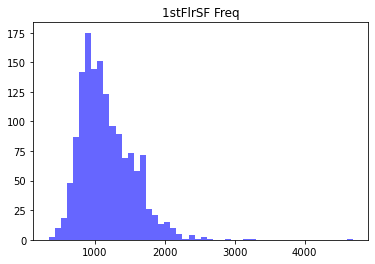

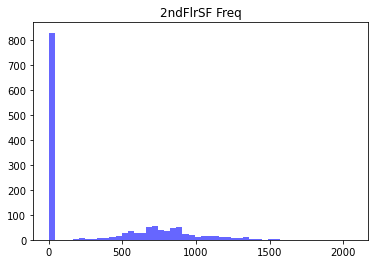

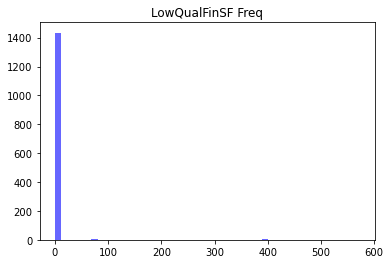

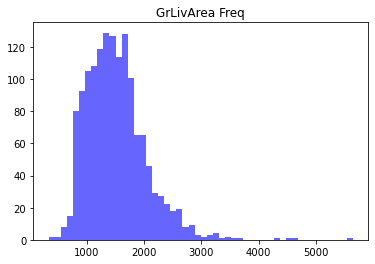

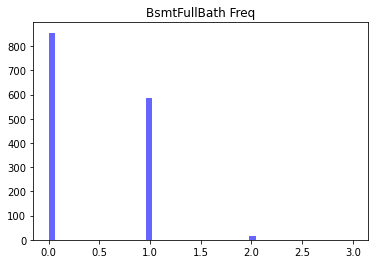

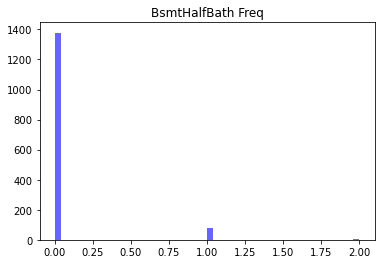

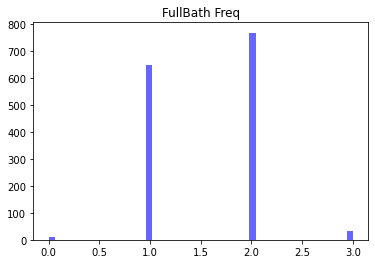

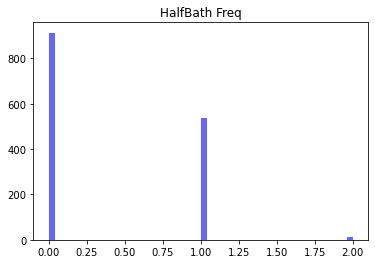

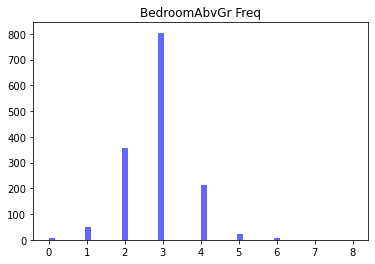

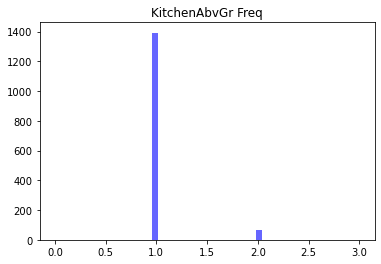

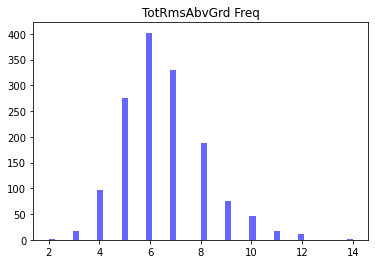

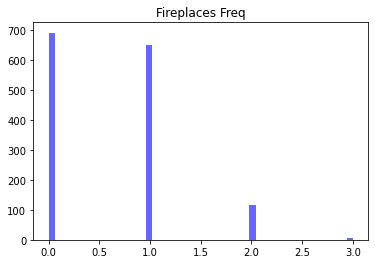

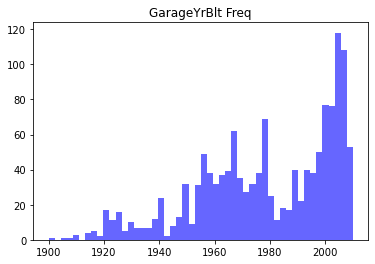

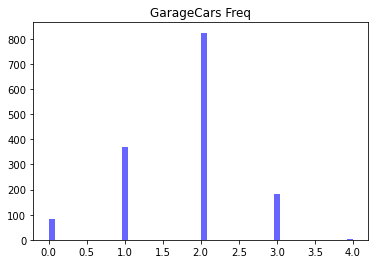

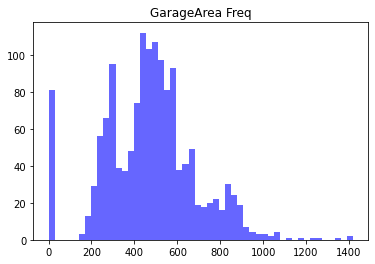

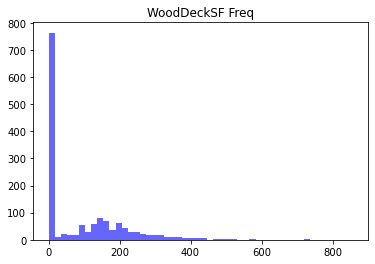

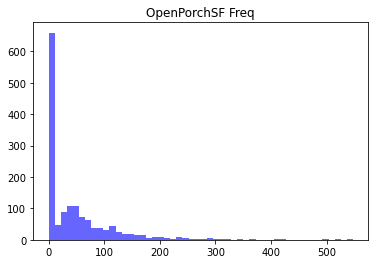

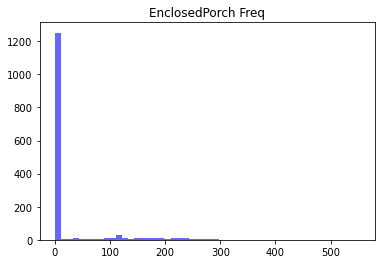

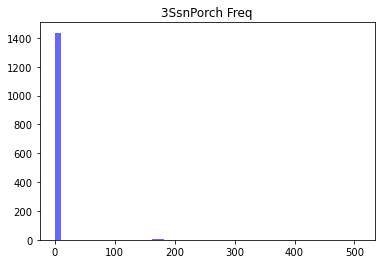

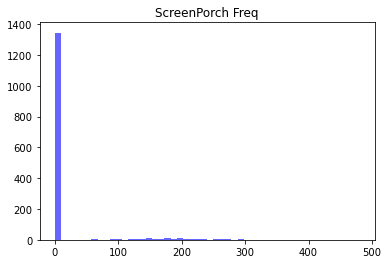

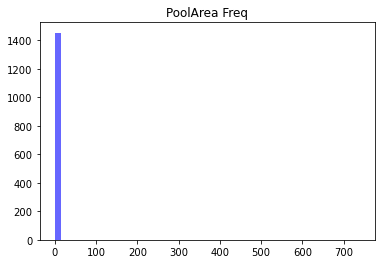

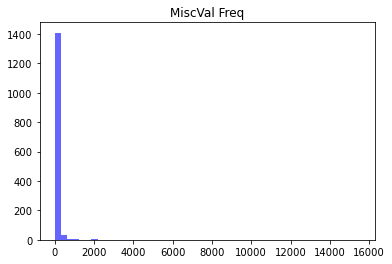

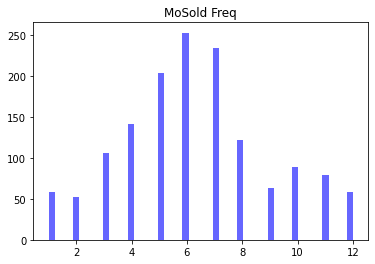

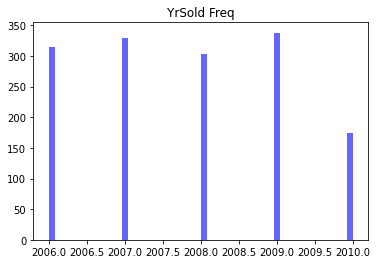

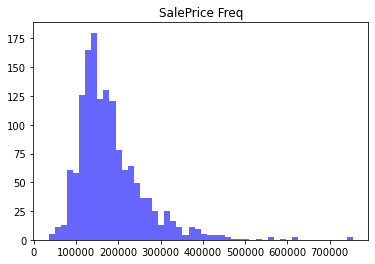

In [51]:
data_dist(df)

In [ ]:
# special notice
# MasVnrType: there's no 'CBlock' Cinder Block in Masonry veneer type
# ExterQual: there's no 'poor' quality of the materials on the exterior
# BsmtQual: there's no 'poor' height of basement under height of 70 inches
# BsmtCond: there's no 'Ex' excellent condition of the basement
# Kitchen: there's no 'poor' kitchen quality 
# Functionality: there's no 'Sal' salvage only home functionality
# PoolQC: there's no 'TA' typical/average pool condition
# MiscFeature: there's no 'TenC' tennis court in misceaneous features uncovered in other categories
# SaleType: there's no 'VWD' Warranty Deed VA loan in the sales type